In [1]:
import essentia
import essentia.standard
import json
import numpy as np
import os
import shutil

This notebook compares Soundboy's Python and TypeScript feature extractors. The code in the next block is taken from `python/analyze_essentia.wav`. Results from the TypeScript featur extractor are saved in the notebooks directory. Set `filename` to something from `./samples` and run the entire notebook. Scroll down to see the comparisons. 

In [2]:
filename = 'bigcheeks-kick.wav'
sr = 22050
duration = 3
nfft = 2048

loader = essentia.standard.MonoLoader(filename='./samples/' + filename, sampleRate=sr)
audio = loader()

if (len(audio) > duration * sr):
    audio = audio[:duration * sr]

n_coef = 13
n_bands = 40
frame_size = 2048
hop = 1024

w = essentia.standard.Windowing(type='hann')
spectrum = essentia.standard.Spectrum()
mfcc = essentia.standard.MFCC(
    numberCoefficients=n_coef, sampleRate=sr, numberBands=n_bands)

mfccs = []

frames = essentia.standard.FrameGenerator(audio, frameSize=frame_size, hopSize=hop)
py_frames = []
for frame in frames:
    mfcc_bands, mfcc_coeffs = mfcc(spectrum(w(frame)))
    mfccs.append(mfcc_coeffs)
    py_frames.append(np.array(frame))

#     mfccs = essentia.array(mfccs).T
#     pad_width = 95 - mfccs.shape[1]
#     mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), 
#                    mode='constant', constant_values=(0, 0))

In [3]:
py_mfccs = np.array(mfccs)
py_mfccs.shape

(11, 13)

In [4]:
def get_json(filename):
    with open(filename) as f:
        return json.load(f)

In [5]:
data = get_json('./mfccs/' + filename + '-mfccs.json')
js_mfccs = np.array(data)
js_mfccs.shape

(11, 12)

In [6]:
py_mfccs = py_mfccs[:, 1:]
py_mfccs.shape

(11, 12)

In [7]:
py_buffer = np.array(audio)
py_buffer.shape

(9731,)

In [8]:
data = get_json('./buffers/' + filename + '-samples.json')
js_buffer = np.array(data)
js_buffer.shape

(9731,)

In [9]:
py_frames = np.array(py_frames)
py_frames.shape

(11, 2048)

In [10]:
data = get_json('./frames/' + filename + '-frames.json')
js_frames = np.array(data)
js_frames.shape

(11, 2048)

In [11]:
# if importing matplot lib you must run this and restart the kernal :(
# pip install -U numpy

In [12]:
import matplotlib.pyplot as plt

To test that the downsampling works we compare the two buffers.The lines should align nearly perfectly.

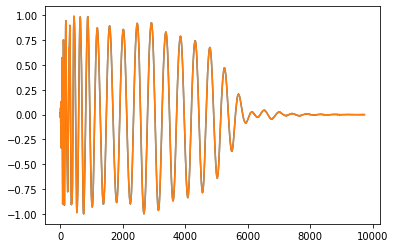

In [13]:
plt.plot(py_buffer, label='py')
plt.plot(js_buffer, label='js')
plt.show()

To test that the MFCCs are equivalent we plot them. If the images are sufficiently similar they should be classified as the same instrument.

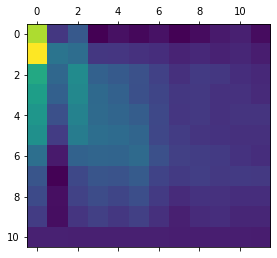

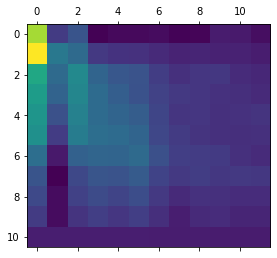

In [14]:
plt.matshow(py_mfccs)
plt.matshow(js_mfccs)